# Импорт необходимых библиотек

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, auc, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Загрузка и предобработка данных

In [2]:
# Загружаем список отзывов из тренировочной подвыборки
train_txt_data = []

# Сначала позитивные отзывы
for file_path in glob.glob('train\pos\*.txt'):
    with open(file_path, 'r', encoding='utf-8') as f:
        train_txt_data.append(f.read())
# Затем негативные
for file_path in glob.glob('train\neg\*.txt'):
    with open(file_path, 'r', encoding='utf-8') as f:
        train_txt_data.append(f.read())

# Загружаем список отзывов из тестовой подвыборки
test_txt_data = []

# Сначала позитивные отзывы
for file_path in glob.glob('test\pos\*.txt'):
    with open(file_path, 'r', encoding='utf-8') as f:
        test_txt_data.append(f.read())
# Затем негативные
for file_path in glob.glob('test\neg\*.txt'):
    with open(file_path, 'r', encoding='utf-8') as f:
        test_txt_data.append(f.read())

In [3]:
# Векторизуем подсчет слов исходные тексты
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_txt_data)
X_test = vectorizer.transform(test_txt_data)

In [4]:
# А также составляем соответствующие списки меток классов
y_train = [1] * (len(train_txt_data)//2) + [0] * (len(train_txt_data)//2)
y_test = [1] * (len(test_txt_data)//2) + [0] * (len(test_txt_data)//2)

# Моделирование

Создаем список моделей

In [5]:
model_list = [
    LogisticRegression(random_state=12345, max_iter=2000),
    KNeighborsClassifier(n_neighbors=5),
]

model_names = [
    'Логистическая регрессия',
    'KNN',
]

Проводим тестирование моделей

Логистическая регрессия
Accuracy на тренировочной подвыборке: 99.84%
Accuracy на тестовой подвыборке: 51.75%
Precision на тренировочной подвыборке: 1.0
Precision на тестовой подвыборке: 0.52
Recall на тренировочной подвыборке: 1.0
Recall на тестовой подвыборке: 0.52
F1 мера на тренировочной подвыборке: 1.0
F1 мера на тестовой подвыборке: 0.52


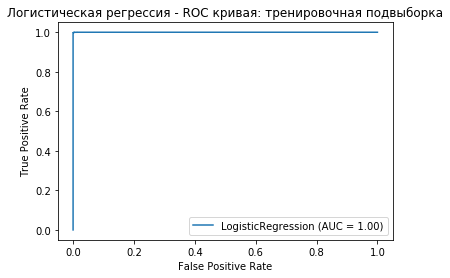

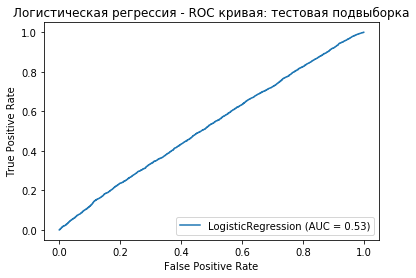

KNN
Accuracy на тренировочной подвыборке: 69.69%
Accuracy на тестовой подвыборке: 49.42%
Precision на тренировочной подвыборке: 0.68
Precision на тестовой подвыборке: 0.49
Recall на тренировочной подвыборке: 0.75
Recall на тестовой подвыборке: 0.56
F1 мера на тренировочной подвыборке: 0.71
F1 мера на тестовой подвыборке: 0.53


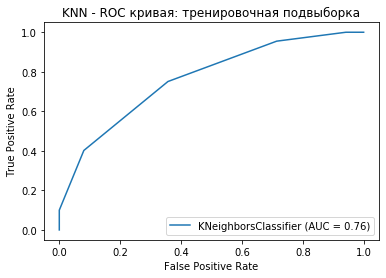

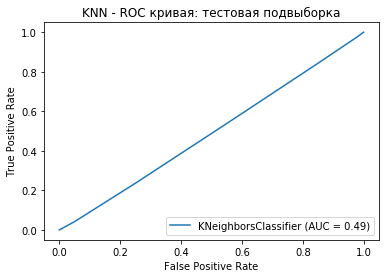

In [6]:
for model, name in zip(model_list, model_names):
    clf = model.fit(X_train, y_train)
    preds_train = clf.predict(X_train)
    preds_test = clf.predict(X_test)
    
    print(name)
    print('Accuracy на тренировочной подвыборке:', str(round(accuracy_score(y_train, preds_train)*100, 2))+'%')
    print('Accuracy на тестовой подвыборке:', str(round(accuracy_score(y_test, preds_test)*100, 2))+'%')
    
    print('Precision на тренировочной подвыборке:', round(precision_score(y_train, preds_train), 2))
    print('Precision на тестовой подвыборке:', round(precision_score(y_test, preds_test), 2))
    
    print('Recall на тренировочной подвыборке:', round(recall_score(y_train, preds_train), 2))
    print('Recall на тестовой подвыборке:', round(recall_score(y_test, preds_test), 2))
    
    print('F1 мера на тренировочной подвыборке:', round(f1_score(y_train, preds_train), 2))
    print('F1 мера на тестовой подвыборке:', round(f1_score(y_test, preds_test), 2))
    
    plot_roc_curve(clf, X_train, y_train)  
    plt.title(name+' - ROC кривая: тренировочная подвыборка')
    plt.show()  

    plot_roc_curve(clf, X_test, y_test)  
    plt.title(name+' - ROC кривая: тестовая подвыборка')
    plt.show()  

Находим топ 15 самых негативных и позитивных отзывов по мнению моделей

In [7]:
top_N = 15

for model, name in zip(model_list, model_names):
    clf = model.fit(X_train, y_train)
    preds_proba = clf.predict_proba(X_test)
    neg_proba = np.array([el[0] for el in preds_proba])
    pos_proba = np.array([el[1] for el in preds_proba])
    
    print('['+name+']')
    print('Самые негативные рецензий из тестовой подвыборки по мнению модели:')
    for index in neg_proba.argsort()[-top_N:][::-1]:
        print('='*20)
        print(test_txt_data[index])
        print('='*20)
        print()
    print('Самые позитивные рецензий из тестовой подвыборки по мнению модели:')
    for index in pos_proba.argsort()[-top_N:][::-1]:
        print('='*20)
        print(test_txt_data[index])
        print('='*20)
        print()

[Логистическая регрессия]
Самые негативные рецензий из тестовой подвыборки по мнению модели:
Although little more than a pleasant 11-minute musical diversion (it's rightly billed as a "Tabloid Musical") EVERY Sunday is one of the most famous and precious documents in cinematic history, since it provides an invaluable look at the burgeoning talents of two of the screen's most talented and beloved musical performers: Deanna Durbin and Judy Garland.<br /><br />Although often cited as an screen test of sorts, produced by MGM to test the adolescent appeal of studio contractees Durbin and Garland whose options were reportedly coming up for renewal, this assertion is not entirely accurate. By the time EVERY Sunday was produced in July, 1936, Deanna Durbin's contract with MGM had already lapsed and she had been immediately signed by Universal a month earlier, in June 1936.<br /><br />However, a provision in Durbin's MGM contract permitted the studio to exercise an option on her services for up

[KNN]
Самые негативные рецензий из тестовой подвыборки по мнению модели:
For every fan of coming of age tales, this 3 hour adaptation of the<br /><br />Sarah Waters novel is pure fun. Cinematic nods to Baz Luhrman's<br /><br />kinetic style, as well as to all those prim and proper period pieces<br /><br />ever present on the BBC (where you're likely to have seen almost<br /><br />every prominent member of this cast). It's rather bawdy and over<br /><br />the top in spots, but that's just what the novel called for. The cast<br /><br />is appealing and, in the cases of Anna Chancellor and Hugh<br /><br />Bonneville, perfect. In the case of Rachel Sterling, as our heroine<br /><br />Nan, you simply must overlook the fact that she's far too pretty to<br /><br />ever be mistaken for a boy and run with it. It's a fantasy, after all. <br /><br />Some fans of the novel may be put out by the various changes in<br /><br />character (particularly that of Jodhi May's character, Florence), but<br /

Написание собственных функций подсчета

In [8]:
# Функция вычисления tp, fp, tn, fn
def count_pos_neg(y_true, y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for true_val, pred_val in zip(y_true, y_pred):
        if true_val == pred_val and true_val == 1:
            tp += 1
        elif true_val == pred_val and true_val == 0:
            tn += 1
        elif pred_val == 1:
            fp += 1
        else:
            fn += 1
    
    return tp, fp, tn, fn


# Функция вычисления precision
def own_precision_score(y_true, y_pred):
    tp, fp, tn, fn = count_pos_neg(y_true, y_pred)
    return (tp / (tp + fp))

# Функция вычисления recall
def own_recall_score(y_true, y_pred):
    tp, fp, tn, fn = count_pos_neg(y_true, y_pred)
    return (tp / (tp + fn))
            
# Функция вычисления f1 меры
def own_f1_score(y_true, y_pred):
    precision = own_precision_score(y_true, y_pred)
    recall = own_recall_score(y_true, y_pred)
            
    return (2 * (precision * recall) / (precision + recall))

Тестирование разработанного функционала

In [9]:
for model, name in zip(model_list, model_names):
    clf = model.fit(X_train, y_train)
    preds_train = clf.predict(X_train)
    preds_test = clf.predict(X_test)
    
    print()
    print(name)
    
    print('Precision на тренировочной подвыборке:', round(own_precision_score(y_train, preds_train), 2))
    print('Precision на тестовой подвыборке:', round(own_precision_score(y_test, preds_test), 2))
    
    print('Recall на тренировочной подвыборке:', round(own_recall_score(y_train, preds_train), 2))
    print('Recall на тестовой подвыборке:', round(own_recall_score(y_test, preds_test), 2))
    
    print('F1 мера на тренировочной подвыборке:', round(own_f1_score(y_train, preds_train), 2))
    print('F1 мера на тестовой подвыборке:', round(own_f1_score(y_test, preds_test), 2))


Логистическая регрессия
Precision на тренировочной подвыборке: 1.0
Precision на тестовой подвыборке: 0.52
Recall на тренировочной подвыборке: 1.0
Recall на тестовой подвыборке: 0.52
F1 мера на тренировочной подвыборке: 1.0
F1 мера на тестовой подвыборке: 0.52

KNN
Precision на тренировочной подвыборке: 0.68
Precision на тестовой подвыборке: 0.49
Recall на тренировочной подвыборке: 0.75
Recall на тестовой подвыборке: 0.56
F1 мера на тренировочной подвыборке: 0.71
F1 мера на тестовой подвыборке: 0.53


# Выводы

Таким образом, мы решили задачу бинарной классификации отзывов. Также были написаны собственные функции по вычислению таких метрик, как precision, recall, F1 мера. Результаты вычислений, полученных с помощью определенных ранее функций, совпадают с результатами функций из sklearn, что свидетельствует о правильности написанных функций.